In [1]:
import cv2 as cv
import numpy as np

from Plot import plot_cv, plot_img
from Cnn_Architecture import CourtDetection

In [2]:
model_path = "../Cnn_Architecture/court/keypoints_model.pth"
court_line = CourtDetection(model_path)

This model only works for a tennis court Key Points.

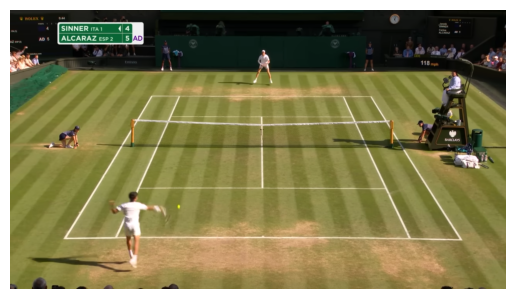

In [3]:
path = "../Data/tennis_game.png"
tennis = cv.imread(path, cv.IMREAD_COLOR_RGB)
plot_img(tennis)

In [4]:
pts = court_line.predict(tennis)
pts

array([ 566.54346,  324.3096 , 1374.2208 ,  324.21893,  214.75514,
        881.0612 , 1730.613  ,  879.3402 ,  667.68884,  324.30032,
        405.25787,  880.8232 , 1273.0149 ,  324.12247, 1541.3727 ,
        879.45703,  632.4419 ,  401.74866, 1309.1193 ,  401.50745,
        503.00098,  679.92004, 1442.1903 ,  679.17395,  970.22876,
        401.62247,  972.57776,  679.7189 ], dtype=float32)

In [5]:
points = np.array(pts, dtype=np.float32).reshape(-1, 2)
Height, Width, channels = tennis.shape
black = np.zeros((Height, Width, channels), dtype=np.uint8)

In [6]:
for (x, y) in points:
    cv.circle(black, (int(x), int(y)), 8, (0, 255, 0), -1)
    cv.circle(tennis, (int(x), int(y)), 8, (0, 255, 0), -1)

In [7]:
hull = cv.convexHull(points)
hull_int = hull.astype(int)  
cv.polylines(black, [hull_int], isClosed=True, color=(0, 0, 255), thickness=2)
cv.polylines(tennis, [hull_int], isClosed=True, color=(0, 0, 255), thickness=2)

array([[[ 34,  34,  30],
        [ 34,  34,  30],
        [ 34,  34,  30],
        ...,
        [  5,   8,   1],
        [  5,   8,   1],
        [  5,   8,   1]],

       [[ 34,  34,  30],
        [ 34,  34,  30],
        [ 34,  34,  30],
        ...,
        [  5,   8,   1],
        [  5,   8,   1],
        [  5,   8,   1]],

       [[ 34,  34,  30],
        [ 34,  34,  30],
        [ 34,  34,  30],
        ...,
        [  5,   8,   1],
        [  5,   8,   1],
        [  5,   8,   1]],

       ...,

       [[ 61,  38,  40],
        [ 62,  40,  41],
        [ 65,  43,  44],
        ...,
        [137, 134,  71],
        [137, 134,  71],
        [137, 134,  71]],

       [[ 61,  38,  41],
        [ 63,  40,  43],
        [ 66,  43,  46],
        ...,
        [138, 134,  72],
        [138, 135,  72],
        [138, 135,  72]],

       [[ 61,  38,  41],
        [ 63,  40,  43],
        [ 66,  43,  46],
        ...,
        [138, 135,  72],
        [139, 135,  72],
        [139, 135,  72]]

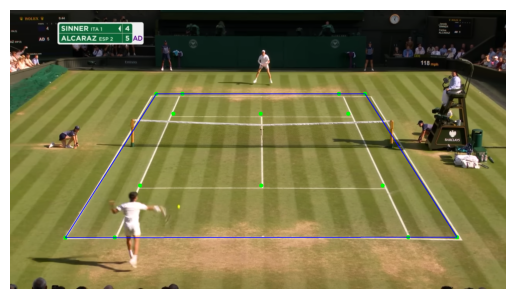

In [8]:
plot_img(tennis)

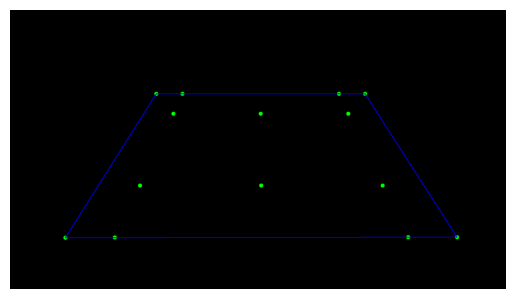

In [9]:
plot_img(black)